## DATA UNDERSTANDING

Libraries to be used

In [59]:
# For data analysis and manipulation
import pandas as pd
import numpy as np

# For visualisation
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_palette("Spectral")  # Setting style for plots
sns.set_style("darkgrid")

# For ignoring warnings
import warnings
warnings.filterwarnings('ignore')


Loading data

In [7]:
store_data = pd.read_csv('SampleSuperstore.csv')
store_data.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


Info of dataset

In [61]:
store_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


**There are `12` columns and `9994` rows which are non-null. Each column has the same number of non-null values meaning there are no null values in this dataframe this can be confirmed below.** 

In [62]:
store_data.isnull().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

**As confirmed there are no null values in this dataframe.**

Summary of numerical columns in dataframe.

In [63]:
store_data.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


**Ignoring the `Postal Code` column which is to be dropped since it has no use for in our analysis. The mean of the numerical columns isn't thay high and the std which is low shows that  most of the numerical data is most likely at the centre.**

Dropping `Postal Code` column.

In [64]:
store_data.drop('Postal Code', axis=1, inplace=True)

## EXPLORATORY DATA ANALYSIS

The goal is to find the weak areas one can work on to maximise profit.

Sum of profit brought by each `Category`

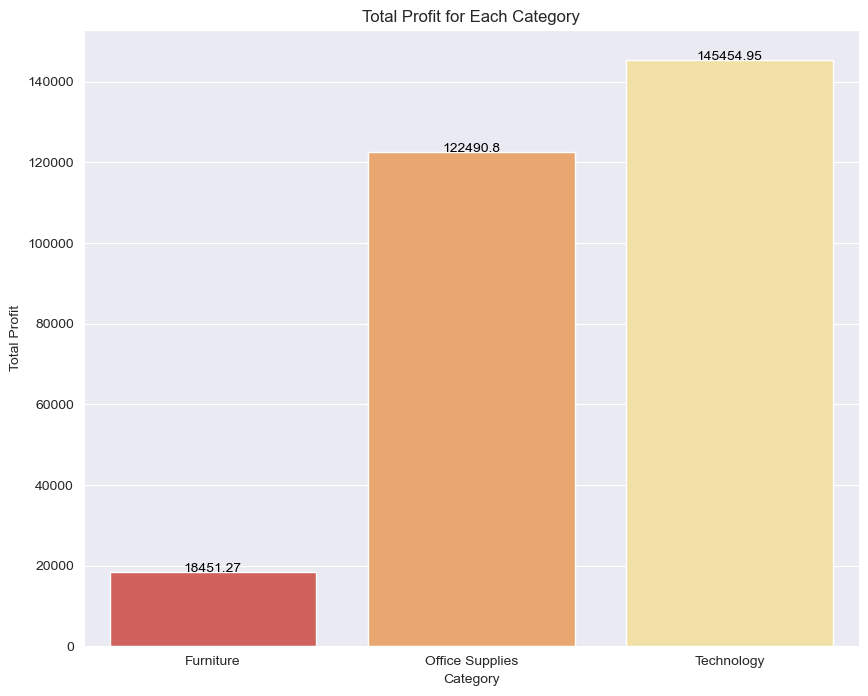

In [106]:
# Categories dataframe
category_data = store_data.groupby(by='Category').sum()[['Profit']].sort_values(by='Profit')

# Plotting
plt.figure(figsize=(10, 8))
plt.xlabel('Category')
plt.ylabel('Total Profit')
plt.title('Total Profit for Each Category')
ax = sns.barplot(x=category_data.index, y=category_data['Profit'].values)

# Adding the actual number on top of each bar
for i, val in enumerate(category_data['Profit'].values):
    ax.text(i, val + 10, str(round(val, 2)), color='black', ha='center')


**`Technology` seems to be making the most profit across the whole country while `Furniture` seems to be making the least profit from the categories an area of weakness which one can work on to improve profit is the `Furniture` category.**

Sum of profit for each `Sub-Category`

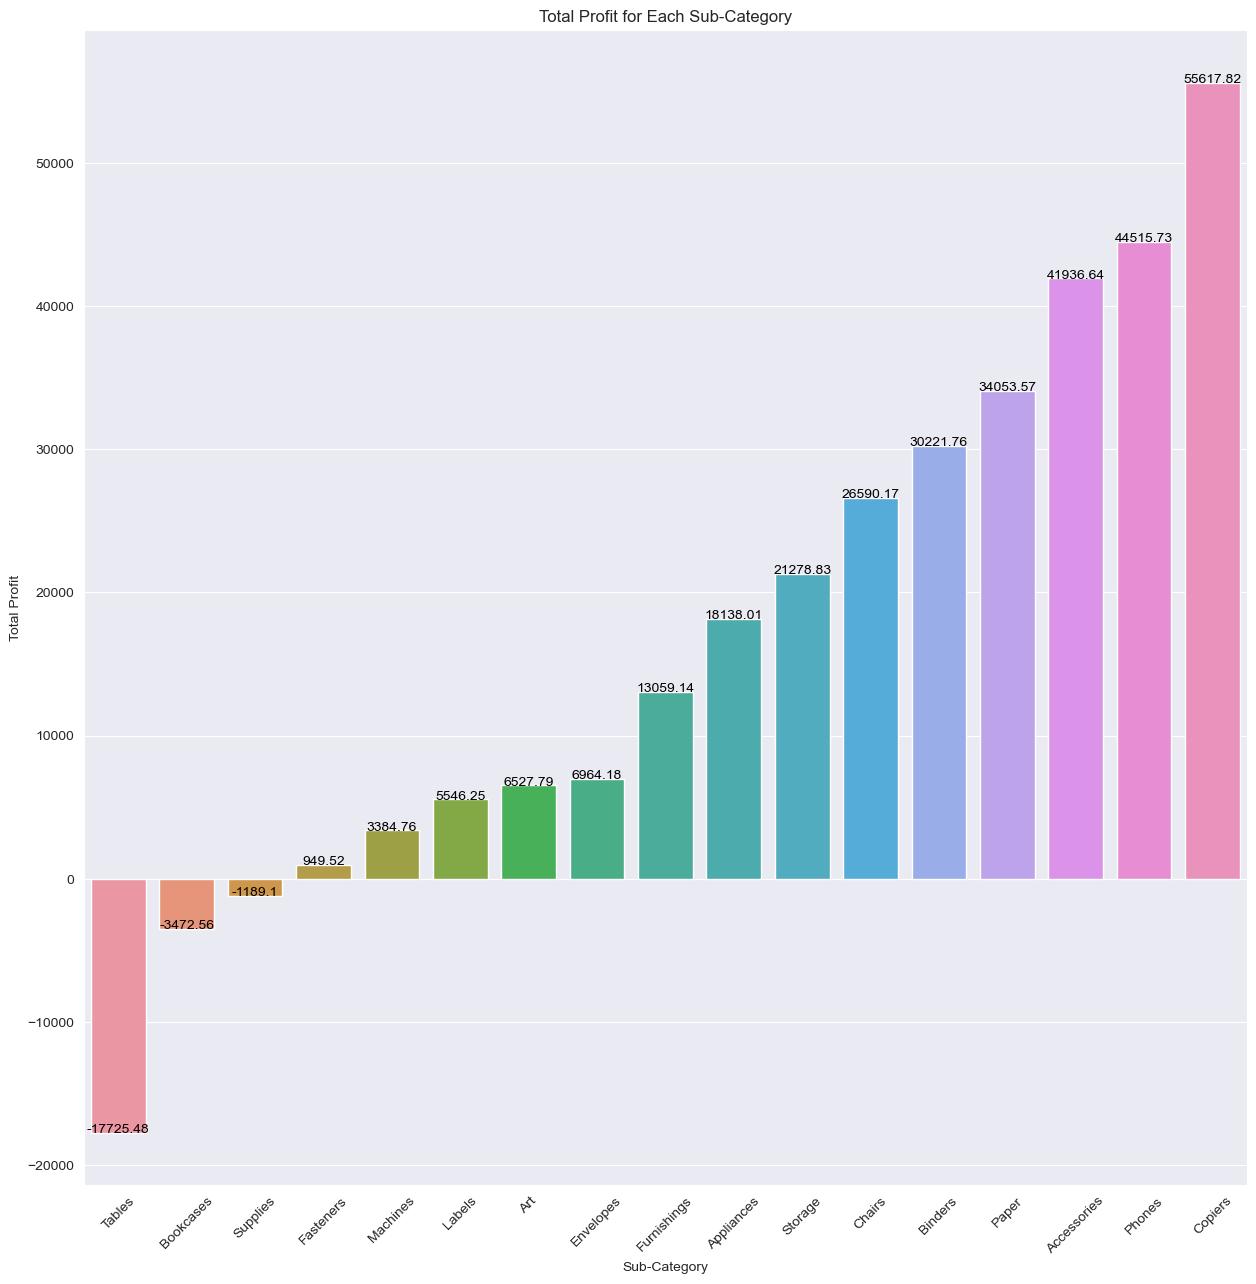

In [107]:
# Sub-categories dataframe
sub_category_data = store_data.groupby(by='Sub-Category').sum()[['Profit']].sort_values(by='Profit')

# Plotting
plt.figure(figsize=(15, 15))
plt.xticks(rotation=45)
plt.xlabel('Sub-Category')
plt.ylabel('Total Profit')
plt.title('Total Profit for Each Sub-Category')
ax = sns.barplot(x=sub_category_data.index, y=sub_category_data['Profit'].values)

# Adding the actual number on top of each bar
for i, val in enumerate(sub_category_data['Profit'].values):
    ax.text(i, val + 10, str(round(val, 2)), color='black', ha='center')

**From this bar-chart of the total profit for each sub-category we can see that `Copiers` have brought the most amount of profit while `Tables` have brought the least amount of total profit. Hence another weak area one might work on is to figure out why tables are not bringing a profit in terms of `Sales`.**

Sum of profit for each `Shipping Mode`

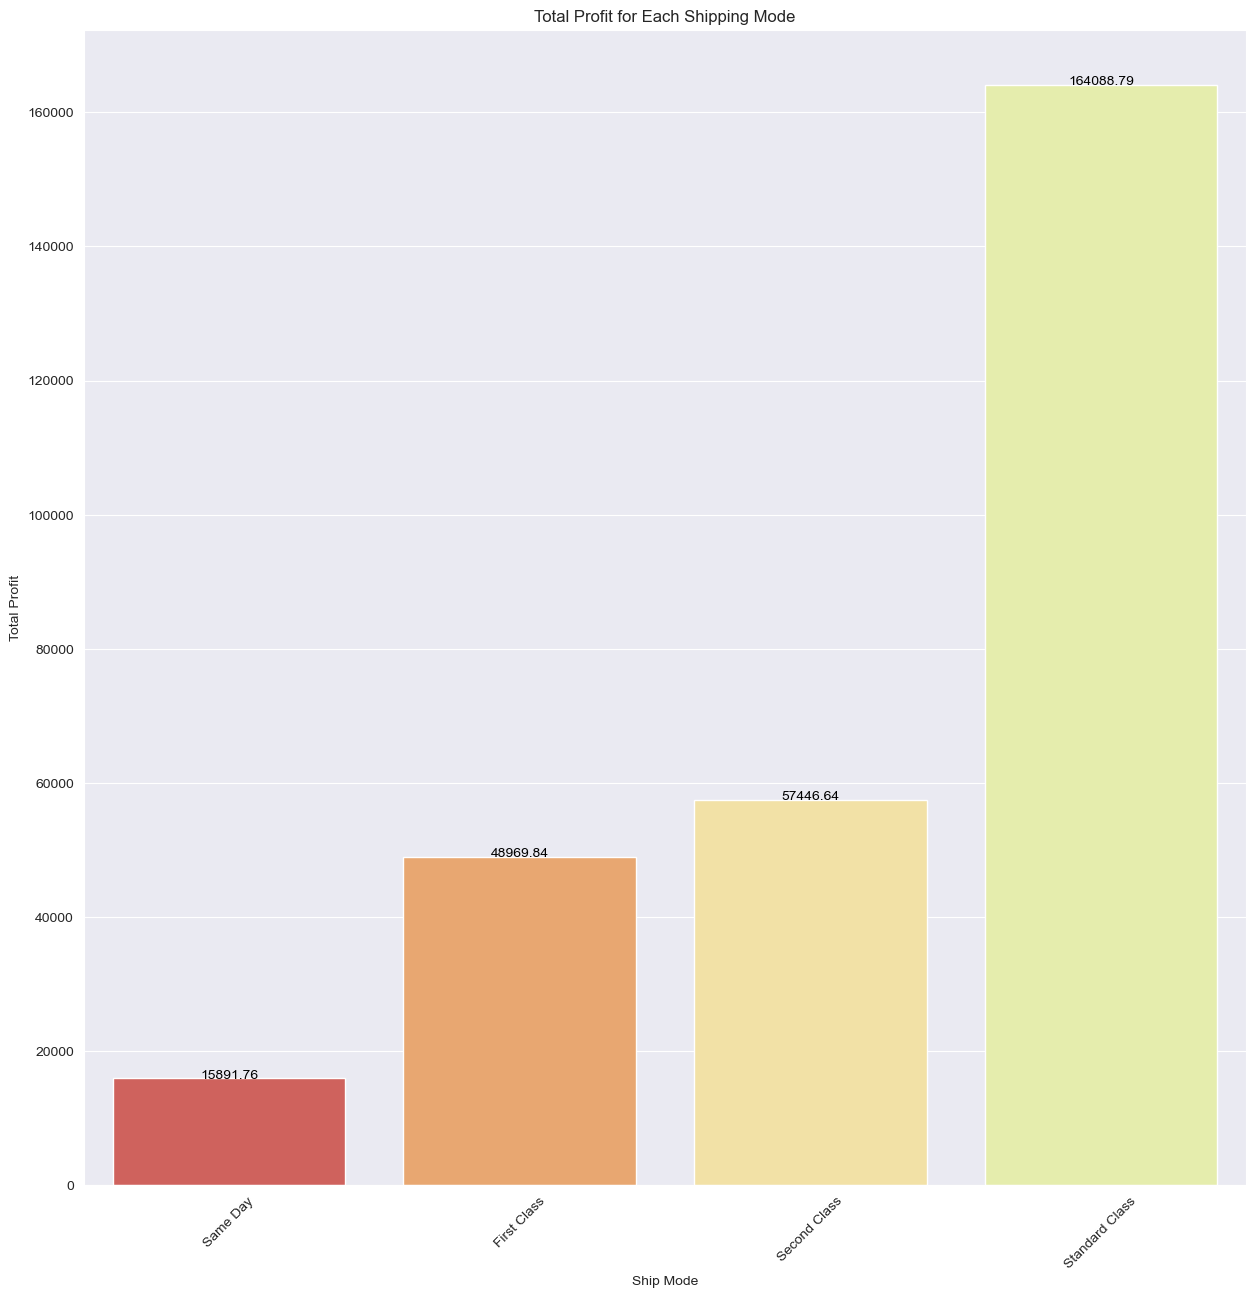

In [112]:
# Shipping dataframe
shipping_data = store_data.groupby(by='Ship Mode').sum()[['Profit']].sort_values(by='Profit')

# Plotting
plt.figure(figsize=(15, 15))
plt.xticks(rotation=45)
plt.xlabel('Ship Mode')
plt.ylabel('Total Profit')
plt.title('Total Profit for Each Shipping Mode')
ax = sns.barplot(x=shipping_data.index, y=shipping_data['Profit'].values)

# Adding the actual number on top of each bar
for i, val in enumerate(shipping_data['Profit'].values):
    ax.text(i, val + 10, str(round(val, 2)), color='black', ha='center')

**Interesting enough the quality of the shipping method is indirectly proportional to the profit brought by it as seen above. From this, we can conclude that a way to maximise profit, is to increase the availability of `Standard Class` shipments for all the categories and sub-categories. One can also work on Same Day shipments as a weak area to figure out why such shipments are not bringing profit.**

Sum of profit for each `Region`

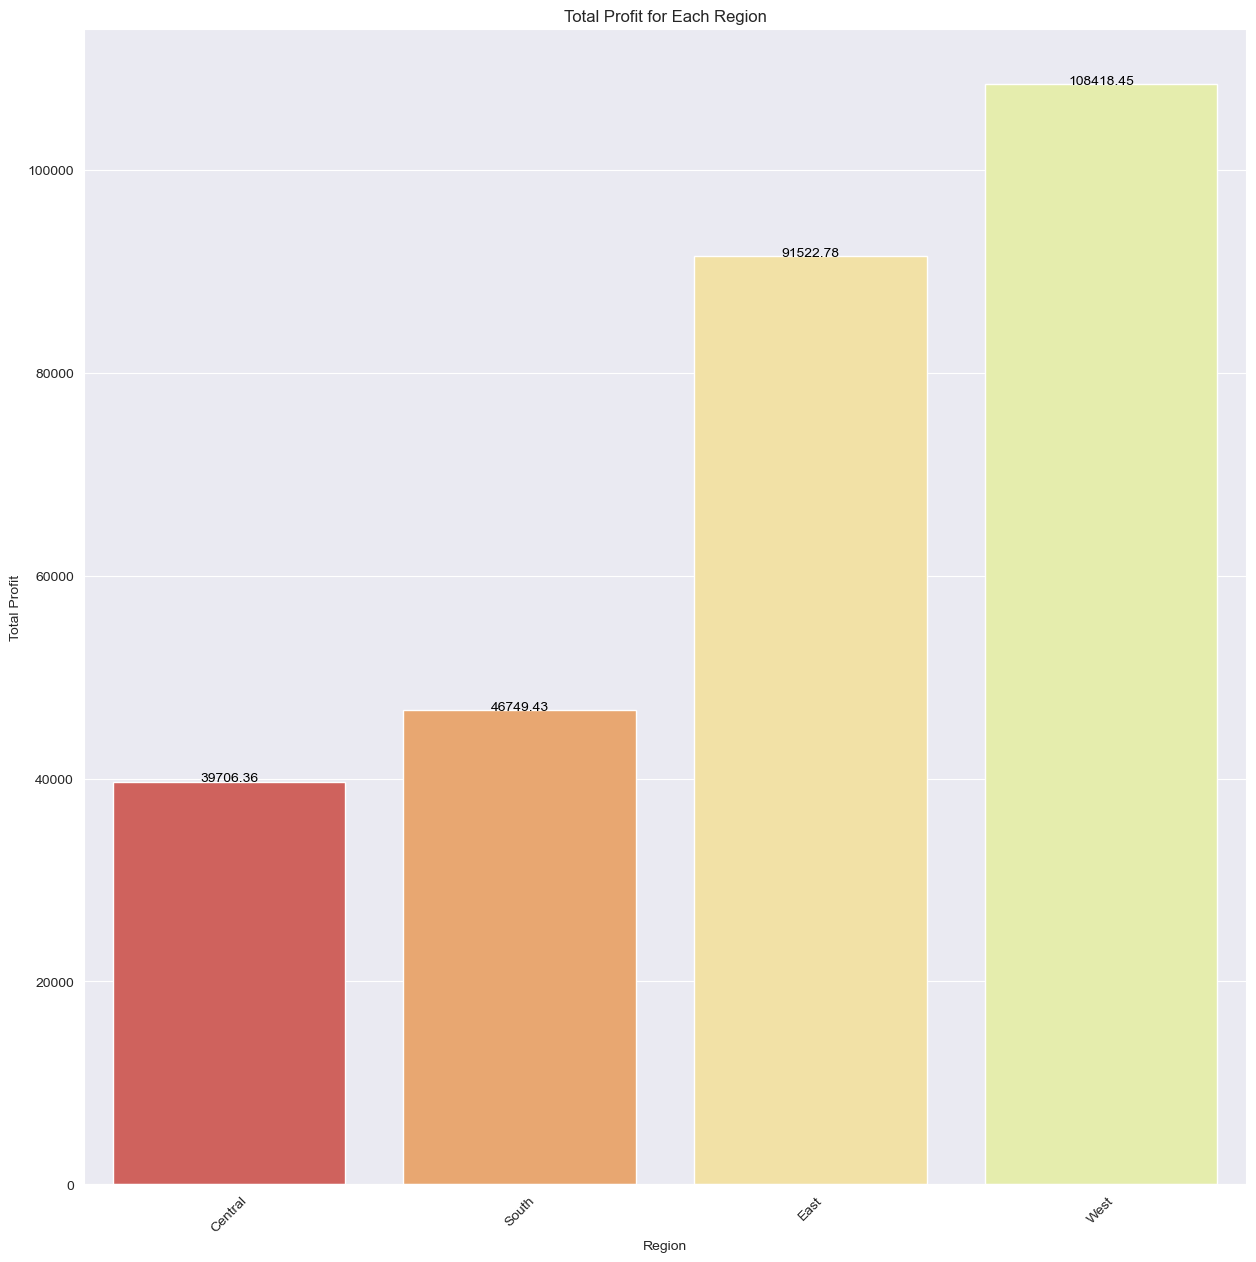

In [115]:
# Regions dataframe
region_data = store_data.groupby(by='Region').sum()[['Profit']].sort_values(by='Profit')

# Plotting
plt.figure(figsize=(15, 15))
plt.xticks(rotation=45)
plt.xlabel('Ship Mode')
plt.ylabel('Total Profit')
plt.title('Total Profit for Each Region')
ax = sns.barplot(x=region_data.index, y=region_data['Profit'].values)

# Adding the actual number on top of each bar
for i, val in enumerate(region_data['Profit'].values):
    ax.text(i, val + 10, str(round(val, 2)), color='black', ha='center')

**States from the Western Region seem to bring the most profit so a way to maximise profit is for the company to focus their efforts on the `West` region of America. Also, focus on the Central region to figure out why it has the lowest profit from all the regions.**

Focusing on the `Central` region to see which states are causing loss of profit

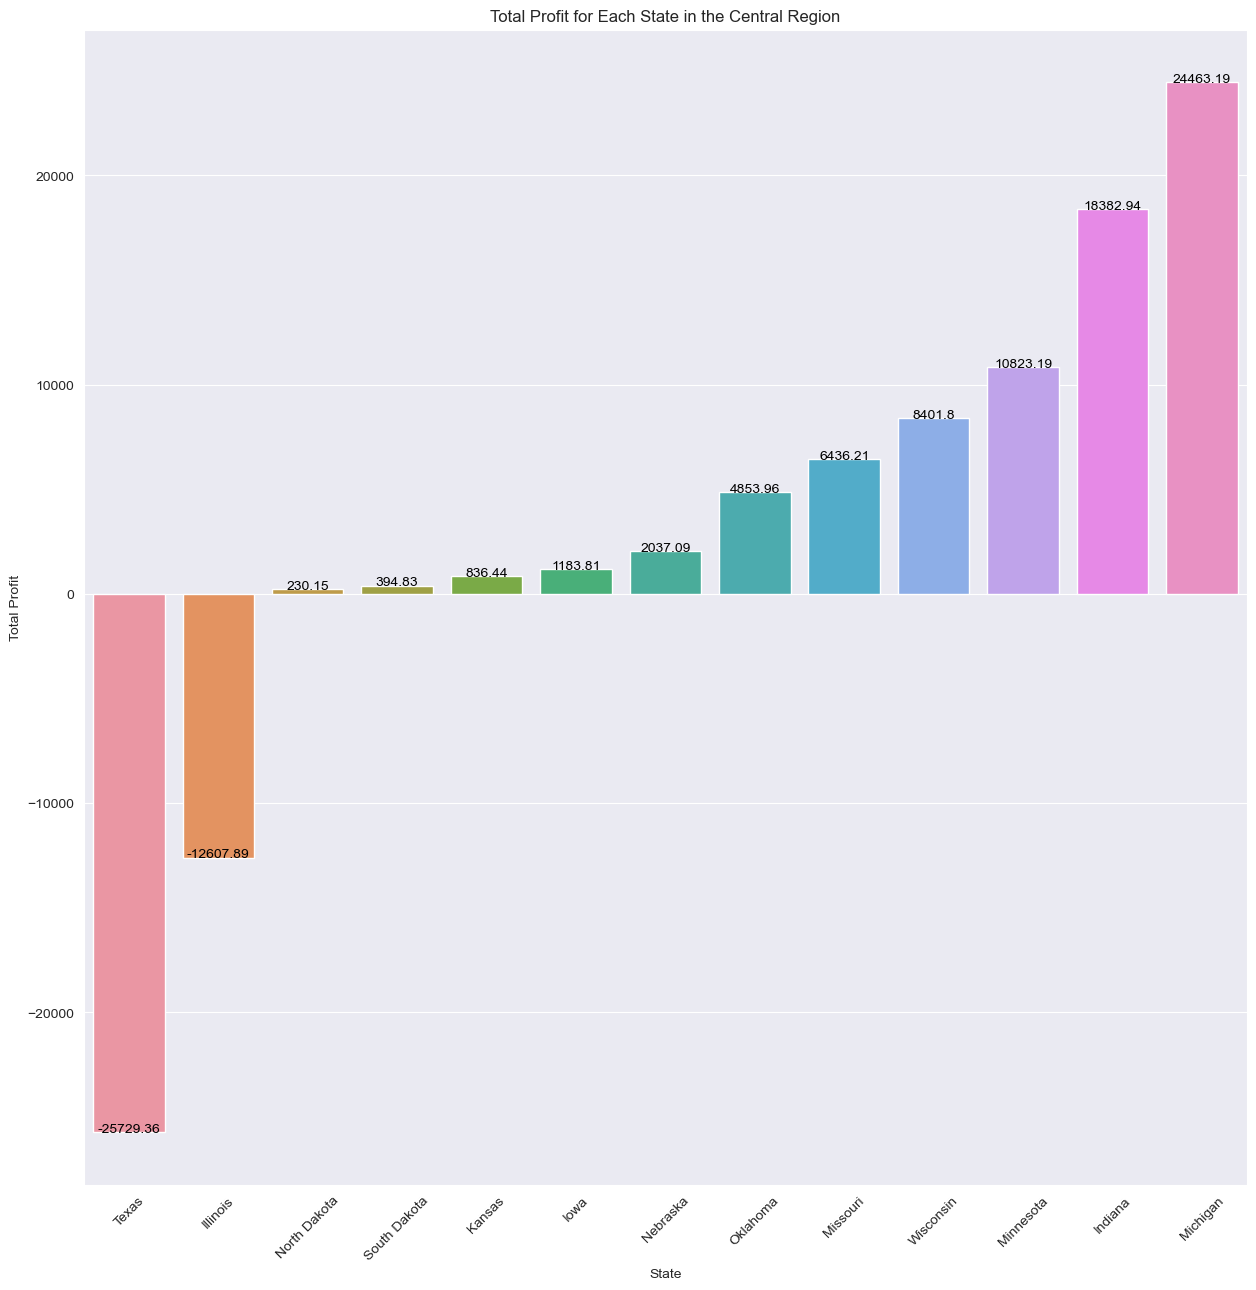

In [129]:
# Data from central states
central_data = store_data[store_data['Region'] == 'Central']

# Grouping by states
state_data = central_data.groupby(by='State').sum()[['Profit']].sort_values(by='Profit')

# Plotting
plt.figure(figsize=(15, 15))
plt.xticks(rotation=45)
plt.xlabel('Central State')
plt.ylabel('Total Profit')
plt.title('Total Profit for Each State in the Central Region')
ax = sns.barplot(x=state_data.index, y=state_data['Profit'].values)

# Adding the actual number on top of each bar
for i, val in enumerate(state_data['Profit'].values):
    ax.text(i, val + 10, str(round(val, 2)), color='black', ha='center')

**`Texas` region seems to be the culprit of the low profit together with `Illinois` so an area of weakness to focus on are those 2 states from the `Central` region as they seem to be bringing the lowest profits compared to other states. The negative profits also show that they are bleeding money.**

Sum of profits by `Segment`

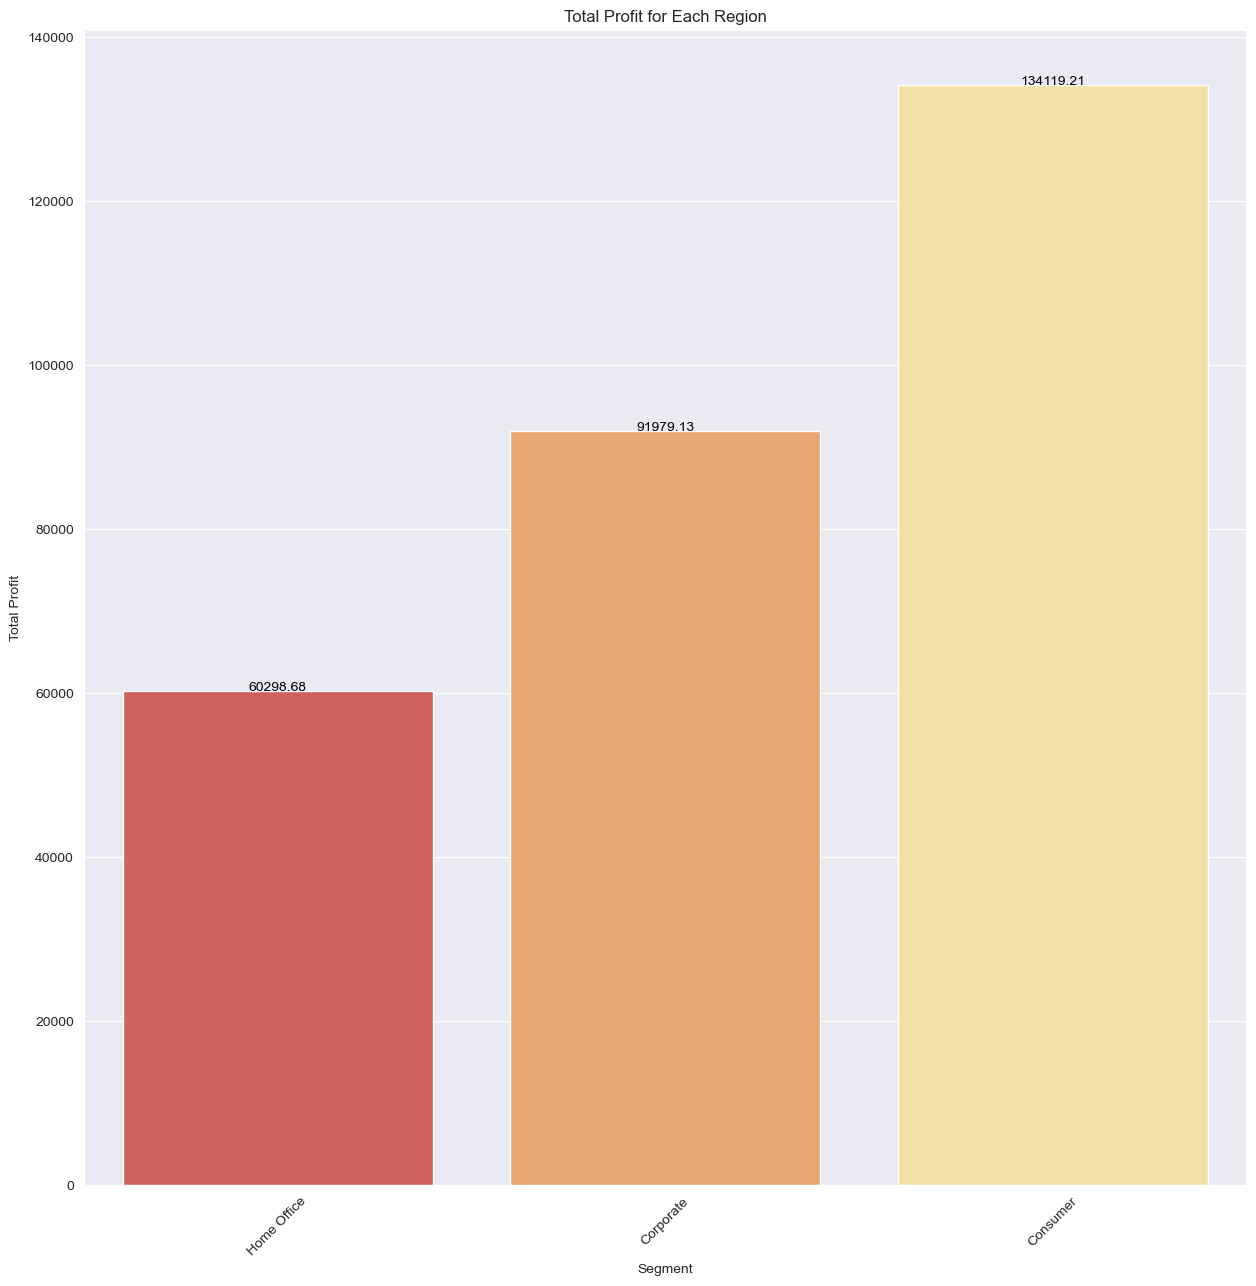

In [127]:
# Regions dataframe
segment_data = store_data.groupby(by='Segment').sum()[['Profit']].sort_values(by='Profit')

# Plotting
plt.figure(figsize=(15, 15))
plt.xticks(rotation=45)
plt.xlabel('Segment')
plt.ylabel('Total Profit')
plt.title('Total Profit for Each Segment')
ax = sns.barplot(x=segment_data.index, y=segment_data['Profit'].values)

# Adding the actual number on top of each bar
for i, val in enumerate(segment_data['Profit'].values):
    ax.text(i, val + 10, str(round(val, 2)), color='black', ha='center')

**The `Consumer` market is the most profitable while the `Home Office` market is the least profitable. Hence a way to maximise profit is to focus more of the efforts on the Consumer market. An area of weakness one may also focus on to maximise profit is to figure out why `Home Office` equipment has the lowest profit.**

## CONCLUSION

The exploratory data analysis conducted on the retail dataset reveals valuable insights that can guide strategies for profit maximization. Here are the key findings:

1. **Category Analysis:**
   - **Technology Dominance:** Technology products exhibit the highest profitability across the country, indicating a strength to leverage.
   - **Furniture Challenge:** Furniture stands out as a weak area, suggesting a need for focused improvement strategies to enhance profitability.

2. **Sub-Category Analysis:**
   - **Profitable Copiers:** Copiers emerge as the most profitable sub-category, while Tables lag behind, indicating a potential area for investigation and improvement in sales strategies.

3. **Shipping Mode Impact:**
   - **Shipping and Profit Correlation:** A notable correlation between shipping methods and profit is observed. Standard Class shipments appear more profitable. Addressing challenges in Same Day shipments could unlock additional profit potential.

4. **Regional Profit Variations:**
   - **Regional Profit Distribution:** Western states contribute significantly to profit, suggesting a strategic focus on this region. Meanwhile, the Central region shows the lowest profit, with Texas and Illinois identified as areas requiring attention and improvement.

5. **Segment Profitability:**
   - **Consumer Market Dominance:** The Consumer market emerges as the most profitable segment, underscoring the importance of directing efforts towards this segment. The Home Office segment, on the other hand, represents a potential area for improvement due to lower profitability.

## RECOMMENDATIONS

- **Category Focus:** Intensify efforts in the Technology category, exploiting its profitability. Implement strategies to enhance the Furniture category's performance.
  
- **Sub-Category Strategies:** Investigate and address challenges in Tables sales. Continue to capitalize on the success of Copiers.

- **Shipping Optimization:** Prioritize Standard Class shipments for enhanced profitability. Investigate and improve factors impacting Same Day shipments.

- **Regional Strategies:** Concentrate efforts on the Western region for continued profit maximization. Address challenges in the Central region, specifically focusing on Texas and Illinois.

- **Segment Strategies:** Channel resources and marketing efforts towards the Consumer market. Explore opportunities for improving Home Office segment profitability.

By strategically addressing the identified weaknesses and building on strengths, the company can optimize its operations and achieve sustainable profit growth. This EDA serves as a foundation for informed decision-making and targeted interventions to maximize overall profitability in the retail business.